**Loading dataset from kaggle**

---



In [2]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c cifar-10

cifar-10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!ls

cifar-10.zip  kaggle.json  sampleSubmission.csv  train	   trainLabels.csv
drive	      sample_data  test.7z		 train.7z


In [6]:
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()

In [7]:
!ls

cifar-10.zip  kaggle.json  sampleSubmission.csv  train	   trainLabels.csv
drive	      sample_data  test.7z		 train.7z


In [8]:
!pip install py7zr

In [9]:
import py7zr
archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [10]:
!ls

cifar-10.zip  kaggle.json  sampleSubmission.csv  train	   trainLabels.csv
drive	      sample_data  test.7z		 train.7z


**Pre-processing the dataset**

---



In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [12]:
filename=os.listdir('/content/train')

In [13]:
len(filename)

50000

In [14]:
df=pd.read_csv('/content/trainLabels.csv')

In [15]:
df.shape

(50000, 2)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      50000 non-null  int64 
 1   label   50000 non-null  object
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [17]:
df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [18]:
df.isnull().sum()

,0
id,0
label,0


In [19]:
df['label']

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


In [20]:
df['label'].unique()

array(['frog', 'truck', 'deer', 'automobile', 'bird', 'horse', 'ship',
       'cat', 'dog', 'airplane'], dtype=object)

In [21]:
df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


Printing Images in batch

---


In [22]:
img_dir= '/content/train'
batch_size= 32

batch_files= [f"{i}.png" for i in range(1,batch_size+1)]
batch_images= []
for file in batch_files:
    path= os.path.join(img_dir, file)
    img= Image.open(path).resize((32, 32))
    batch_images.append(np.array(img))

batch_images = np.array(batch_images)

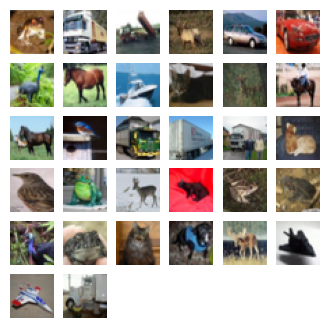

In [23]:
plt.figure(figsize=(4,4))
for i in range(batch_size):
    plt.subplot(6,6,i+1)
    plt.imshow(batch_images[i])
    plt.axis('off')
plt.show()

Printing Images with Labels

---



In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
df= pd.read_csv('/content/trainLabels.csv')

df["id"]= df["id"].astype(str)+".png"
datagen= ImageDataGenerator(rescale=1./255)

train_generator= datagen.flow_from_dataframe(
    dataframe=df,
    directory="/content/train",
    x_col="id",
    y_col="label",
    target_size=(32, 32),
    class_mode="categorical",
    batch_size=16,
    shuffle=True
)

Found 50000 validated image filenames belonging to 10 classes.


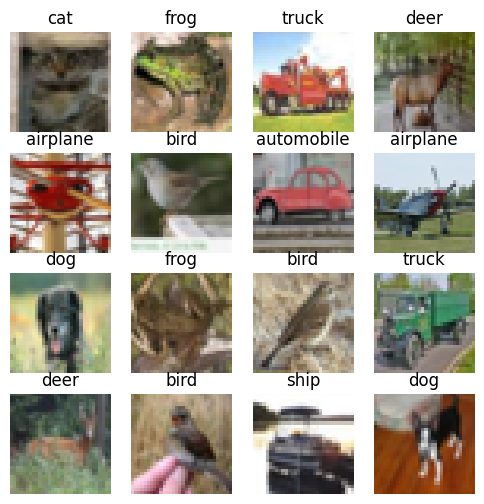

In [25]:
images,labels= next(train_generator)

label_names= list(train_generator.class_indices.keys())
label_indices= labels.argmax(axis=1)

plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i])
    plt.title(label_names[label_indices[i]])
    plt.axis('off')
plt.show()

In [26]:
labels_dictionary= {'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}
labels=[labels_dictionary[i] for i in df['label']]

In [27]:
print(filename[0])

25164.png


In [28]:
id_list=list(df['id'])

In [29]:
train_data_folder='/content/train/'
data=[]

for id in id_list:
  image=Image.open(train_data_folder+str(id))
  image=np.array(image)
  data.append(image)

In [30]:
len(data)

50000

In [31]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
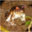

In [32]:
data[0]

In [33]:
X=np.array(data)
Y=np.array(labels)

In [34]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [36]:
print(X.shape,X_train.shape,X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [39]:
# Normalization
X_train_scaled=X_train/255
X_test_scaled=X_test/255

**Training the dataset with simple model**

---



In [40]:
import tensorflow as tf
from tensorflow import keras
from keras import *

In [41]:
total_class=10
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(total_class,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,968 (2.26 MB)

 Trainable params: 197,322 (770.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 394,646 (1.51 MB)

In [42]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [43]:
early_stopping= keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [44]:
history= model.fit(X_train_scaled,Y_train,validation_split=0.2,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2406 - loss: 2.0777 - val_accuracy: 0.3119 - val_loss: 1.8711
Epoch 2/1000
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3376 - loss: 1.8505 - val_accuracy: 0.3479 - val_loss: 1.8069
Epoch 3/1000
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3520 - loss: 1.8143 - val_accuracy: 0.3568 - val_loss: 1.8016
Epoch 4/1000
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3613 - loss: 1.7819 - val_accuracy: 0.3470 - val_loss: 1.7858
Epoch 5/1000
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3675 - loss: 1.7627 - val_accuracy: 0.3419 - val_loss: 1.8074
Epoch 6/1000
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3727 - loss: 1.7551 - val_accuracy: 0.3585 - val_loss: 1.7712
Epoch 7/1000
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3750 - loss: 1.7489 - val_accuracy: 0.3702 - val_loss: 1.7769
Epoch 8/1000
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3799 -

In [45]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy =',accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4009 - loss: 1.6883
Test Accuracy = 0.40389999747276306


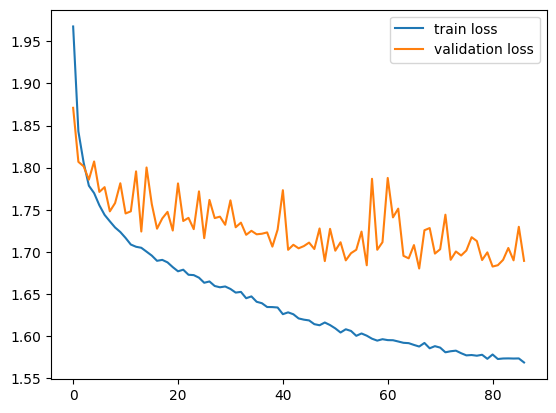

In [46]:
h=history

plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

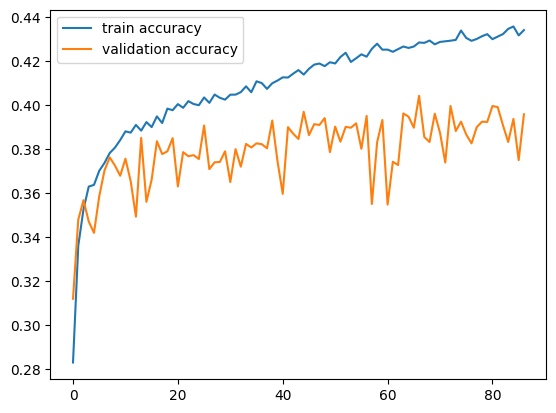

In [47]:
plt.plot(h.history['accuracy'],label='train accuracy')
plt.plot(h.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.show()

**Training with ResNet Architecture**

---



In [48]:
# from tensorflow.keras import Sequential, models, layers
# from tensorflow.keras.layers import Dense, Dropout, Flatten
# from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.models import load_model
# from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [49]:
convolutional_base=ResNet50(weights='imagenet',include_top=False,input_shape=(256,256,3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [50]:
convolutional_base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [52]:
total_class=10
model=models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(total_class,activation='softmax'))

In [53]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [54]:
history=model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=20)

Epoch 1/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 443s 346ms/step - accuracy: 0.3341 - loss: 2.0209 - val_accuracy: 0.7632 - val_loss: 0.9200
Epoch 2/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 383s 340ms/step - accuracy: 0.6750 - loss: 1.0764 - val_accuracy: 0.8775 - val_loss: 0.5269
Epoch 3/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 382s 340ms/step - accuracy: 0.8029 - loss: 0.7551 - val_accuracy: 0.9110 - val_loss: 0.3752
Epoch 4/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 382s 340ms/step - accuracy: 0.8633 - loss: 0.5840 - val_accuracy: 0.9252 - val_loss: 0.3157
Epoch 5/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 382s 340ms/step - accuracy: 0.9078 - loss: 0.4478 - val_accuracy: 0.9335 - val_loss: 0.2704
Epoch 6/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 382s 340ms/step - accuracy: 0.9389 - loss: 0.3466 - val_accuracy: 0.9350 - val_loss: 0.2553
Epoch 7/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 382s 340ms/step - accuracy: 0.9520 - loss: 0.2853 - val_accuracy: 0.9405 - val_loss: 0.2385
Epoch 8/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 382s 340ms/step - ac

In [55]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy =',accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 110ms/step - accuracy: 0.9437 - loss: 0.2518
Test Accuracy = 0.9431999921798706


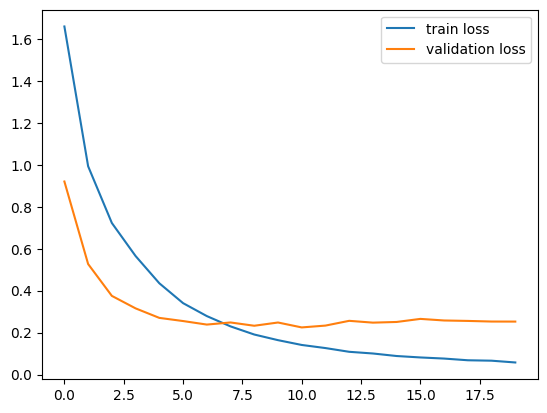

In [56]:
h=history

plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

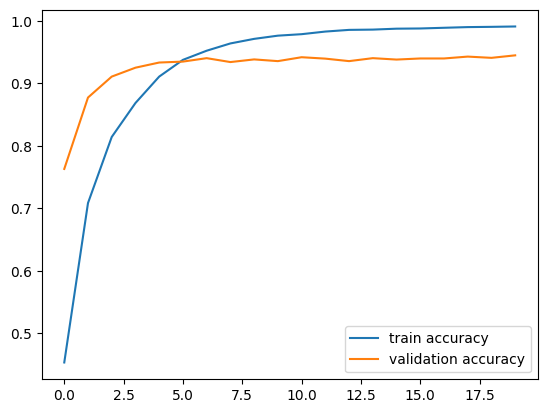

In [57]:
plt.plot(h.history['accuracy'],label='train accuracy')
plt.plot(h.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.show()